# Titanic

I felt as if I couldn't call myself a true Data Scientist without putting together a Titanic dataset project. It's almost become the "Hello World" of Data Science but I would argue it has stiff competition with the Iris, Wine, and MNIST datasets.       <br><br>
In any case, for those who are somehow unaware: The Titanic is the most famous cruise disaster in world history. On April 15th 1912, the ship struck an iceberg and sank into the ocean. Since the Titanic was thought to be unsinkable, there were only enough lifeboats for a little less than half of the number of people onboard. As you can infer, this led to much tragedy and death.   <br><br>
James Cameron's movie about the incident became the highest grossing movie of all time when it came out in 1997. It's worth a watch. It's certainly better than his Avatar movie which for some reason overtook Titanic in total gross several years later. <br><br> Our goal here is simple: construct a model that can predict who lived and who died aboard the Titanic. 
<br><br>
Let's get nerdy. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#I use a dark background in my jupyter notebooks so like my visualizations to match. I recommend it if you're feeling adventurous. 
plt.style.use('dark_background')
#Make my visualizations bigger
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
train = pd.read_csv('datasets/train.csv', index_col='PassengerId')
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


891 passengers in our training set with 11 features. Here is a description of our features taken from the Data Dictionary. *My comments / initial predictions are in italics.*  <br><br>
-'survival' - Self explanatory. 0 = No, 1 = Yes. *This is our target feature.*  <br><br>

-'pclass' - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd. *I assume that this will be negatively correllated with survival. I believe the lower class ticket cabins were placed on the lower decks of the boat making it more difficult to get to the lifeboats. Also, there were less lifeboats than there were people on board so I assume the rich people got priority lifeboat treatment.*  <br><br>

-'sex' - Gender. *"Women and children first" is the infamous phrase from the event that indicated who was given priority to the lifeboats. This makes it likely that being female should indicate higher rates of survival.*  <br><br>

-'Age' - Age in years *With children getting priority, we should expect lower ages to lead to higher likelihood of survival.*   <br><br>

-'sibsp' - # of siblings / spouses aboard the Titanic. *Conflating a sibling with a spouse is a strange move and furthermore, it prevents us from finding out who all had multiple spouses on board. **That could have been interesting.** On a serious note, I'll be curious to see what the relationship here will be to our target. I would think having a 0 in this column could be detrimental to survival as you might not have anyone to help you in this very chaotic situation, with the exception of being an only child as I assume their parents would work very hard to ensure their survival. I would assume if you have multiple siblings on board that you are likely to be a child but maybe rich siblings liked to travel together as well.*  <br><br>

-'parch' - # of parents / children aboard the Titanic. *Another weird feature. One would assume that any figure here > 2 would indicate that this person is definitely a child, but what if Grandma and Grandpa wanted to come on this big trip across the Atlantic? You could in theory have your children and your parents on board. Hopefully, there will be enough information within the other features that we can suss out everyone's familial situations.*   	<br><br>

-'ticket' - Ticket number - *Ticket number might have a connection with class but we won't know until we explore.* 	<br><br>

-'fare'	- Passenger fare - *The lower the fare, the poorer the person, the less likely they are to survive is my prediction.*   <br><br>
-'cabin' - Cabin number. *I would expect some correllation here with where the cabin is placed within the ship and could indicate how far people were from lifeboats/how quickly water flooded into their rooms.*   	<br><br>

-'embarked' - Port of Embarkation: C = Cherbourg, France  Q = Queenstown, Ireland S = Southampton, U.K.. *Could be either a class relation/cabin placement for the where the passenger embarked from.* 


## Exploratory Data Analysis

In [3]:
print(204/len(train)*100)
train.info()

22.895622895622896
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We've got numeric and string (object) columns where would expect to see them. We're missing 77% of values in our Cabin column. This will likely not be terribly useful. 

In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived: only 38% of the training passengers survived.  <br><br>

Pclass: From looking at our quartiles. > 50% of passengers were in 3rd class. < 25% were in 1st class.  <br><br>

Age: Average age was 29.7. We've got sizeable standard deviation of 14.5% as well. Our Q1 is 20, our median is 28, and our Q3 is 38 so we must have a few elderly people in the mix. Our max is 80. 80! Can you imagine being 80 on a ship that's hit an iceberg?  <br><br>

SibSp: Remember this is # of Siblings/Spouses. > 50% had neither a sibling nor spouse on board. <br><br>

Parch: # of Parents/Children. > 75% didn't have parents or children on board. <br><br>

Fare: Mean Fare was 32, with the max being over 512. Our Q3 was 31 so the rich with the really expensive fares make up less than 25% of our dataset.  <br><br>

Did our 80 year old survive?


In [5]:
train[train.Age == 80]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


Sure did! An 80 year old man named Algernon Barkworth. Incredible. <br><br>

Here's our target feature better spelled out.

In [6]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

 61.6% of our training passengers didn't make it. We would expect gender to play a huge role in survival since women and children were given priority to the lifeboats. 

In [7]:
men_survival = train[train.Sex == 'male']['Survived'].mean().round(4)
women_survival = train[train.Sex == 'female']['Survived'].mean().round(4)
print(f'{men_survival*100}% of men survived')
print(f'{women_survival*100}% of women survived')

18.89% of men survived
74.2% of women survived


And we were correct. Gender will play a HUGE role in who survives and who doesn't.

When I was looking at the data, I noticed a lot of the married women would be listed in this format: "Mrs. Husband's name (her real name)" leading to longer names for married women. We're going to use the length of their names as a feature and see if that leads to anything. In addition, we're going to do a little string manipulation to get everyone's title (Mr, Miss, etc.).

In [8]:
#create name_length feature from the length of the Name column
train['name_length'] = train.Name.apply(lambda x: len(x))
#create title from splitting it out from the name column
train['title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

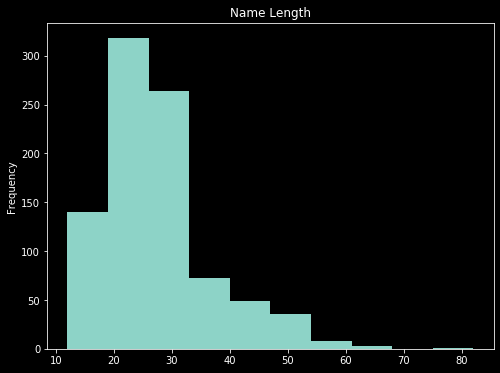

In [9]:
train['name_length'].plot(kind='hist')
plt.title('Name Length')
plt.show()

Let's look at the titles we created. 

In [10]:
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
Don               1
Mme               1
Ms                1
Jonkheer          1
Lady              1
Sir               1
the Countess      1
Name: title, dtype: int64

I had to spend some time on Wikipedia for this section. Regarding titles, they fall into three categories.  <br><br> 
<ins>Personal Titles:</ins>
1. Mr - only indicates that they're male. No indication of marital status. 
2. Miss, Ms, Mlle (Mademoisselle) - unmarried woman.
3. Mrs or Mme (Madam) - married woman
4. Master - young boy (likely rich)
<br><br>

<ins>Occupations:</ins> *I assume these will all be men given the time period.*
1. Dr - Doctor
2. Rev - Reverend
3. Col - Colonel
4. Major 
5. Capt - Captain. They're supposed to go down with the ship if the old adage holds true. 
<br><br>

<ins>Honorifics:</ins>
1. Sir - A man who's been knighted. 
2. Lady - A woman of nobility. A Lord's wife.  
3. Don - A male honorific typically connected to Spain or Italy. 
4. Jonkheer - A male honorific from what were historically known as the Low Countries in Europe. (Netherlands, Belgium et. al.)
5. the Countess - The wife of a Count.   

In [11]:
#A function used to make pivot tables from categorical variables 
def make_pivots(columns):
    for col in columns:
        table = pd.pivot_table(train, index = 'Survived', columns = col, values = 'Ticket' ,aggfunc ='count')
        print(table)
        print()

In [12]:
make_pivots(['title'])

title     Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                    
0          1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1          NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

title     Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                 
0         NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1         1.0   81.0  99.0  1.0  NaN  1.0           1.0  



-The Captain did indeed go down with the ship. Good on him.<br>
-It appears that for a lot of these occupation titles and honorifics, the sample sizes are too small for the model to do much with.<br>
-From looking at these numbers we can develop a tier system of survival: Married Woman > Unmarried Woman > Male<br>
-There aren't really enough honorifics to make a judgment call here but both "The Lady" and "The Countess" survived. 
-Occupations have a high mortality rate as we would expect since they're all men. 
-My biggest surprise in this is the mortality rate of the "Master" title. I expected children, especially ones with titles, to perform better than that. 
<br><br>
Let's look at Masters. 


In [13]:
print(train[train.title=="Master"]['Sex'].value_counts())
print(train[train.title=="Master"]['Age'].value_counts())

male    40
Name: Sex, dtype: int64
1.00     5
4.00     5
3.00     4
9.00     4
2.00     4
0.83     2
8.00     2
11.00    2
7.00     2
0.67     1
0.92     1
0.42     1
10.00    1
6.00     1
12.00    1
Name: Age, dtype: int64


They're all young boys like we expected. Hmm... that's odd. Let's look at survival rates in children. 

In [14]:
kids = train[train.Age < 18]
kids['Survived'].mean()

0.5398230088495575

A 54% survival rate for kids? It's much better than the overall population survival rate of 38% but still much lower than I expected. 

In [15]:
boy_survival = kids[kids.Sex == 'male']['Survived'].mean()
girl_survival = kids[kids.Sex == 'female']['Survived'].mean()
print(f' Boy Survival Rate: {boy_survival}')
print(f' Girl Survival Rate: {girl_survival}')

 Boy Survival Rate: 0.39655172413793105
 Girl Survival Rate: 0.6909090909090909


Girls were 30% more likely to survive than boys? My theory here is my age is too high to consider them as "children" who need priority boarding on the boats. Let's lower the Age threshold. 

In [16]:
kids = train[train.Age < 14]
print(kids['Survived'].mean())
boy_survival = kids[kids.Sex == 'male']['Survived'].mean()
girl_survival = kids[kids.Sex == 'female']['Survived'].mean()
print(f' Boy Survival Rate: {boy_survival}')
print(f' Girl Survival Rate: {girl_survival}')

0.5915492957746479
 Boy Survival Rate: 0.5675675675675675
 Girl Survival Rate: 0.6176470588235294


That's much better. The term men was likely applied to boys in their mid to late teens back then.  <br><br>

Since a lot of these features don't appear once, it could be advantageous to group titles together to give them more meaning to our model.

In [81]:
#creates 5 different categories based on the Passenger's title. 
def title_group(title):
    married_woman = ['Mrs', 'Mme']
    unmarried_woman = ['Miss', 'Ms', 'Mlle']
    occupation = ['Dr', 'Rev', 'Col', 'Major', 'Capt']
    male_honorific = ['Sir', 'Don', 'Jonkheer']
    female_honorific = ['Lady', 'the Countess', 'Dona'] #Dona will appear in our test set 
    
    if title in unmarried_woman:
        return 'Unmarried Woman'
    elif title in occupation:
        return 'Occupation'
    elif title in male_honorific:
        return 'Male Noble'
    elif title in female_honorific:
        return 'Female Noble'
    elif title == 'Mr':
        return 'Man'
    elif title in married_woman:
        return 'Married Woman'
    elif title == 'Master':
        return 'Young Boy' 

In [18]:
#apply the function to our title column to create a new "title_group" column
train['title_group'] = train['title'].apply(title_group)
train['title_group'].value_counts()

Man                517
Unmarried Woman    185
Married Woman      126
Young Boy           40
Occupation          18
Male Noble           3
Female Noble         2
Name: title_group, dtype: int64

In [19]:
make_pivots(['title_group'])

title_group  Female Noble  Male Noble    Man  Married Woman  Occupation  \
Survived                                                                  
0                     NaN         2.0  436.0           26.0        13.0   
1                     2.0         1.0   81.0          100.0         5.0   

title_group  Unmarried Woman  Young Boy  
Survived                                 
0                       55.0       17.0  
1                      130.0       23.0  



I want to utilize the ticket and cabin columns if I can so we're just going to experiment with some feature engineering.

In [20]:
#Boolean feature for if the ticket is numeric.
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
#The first letter of each Cabin is it's group. NaNs will turn into n's.
train['cabin_group'] = train.Cabin.apply(lambda x: str(x)[0])

In [21]:
make_pivots(['cabin_group'])

cabin_group    A     B     C     D     E    F    G    T      n
Survived                                                      
0            8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1            7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0



Separating numeric and categorical features is a great way to do your EDA as you will perform different techniques accordingly. 

In [22]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'name_length', 'title', 'title_group',
       'numeric_ticket', 'cabin_group'],
      dtype='object')

In [23]:
numeric = train[['Age', 'SibSp', 'Parch', 'Fare', 'name_length']]
categ = train[['Pclass', 'Sex', 'numeric_ticket',
               'Embarked','title_group', 'cabin_group']]

We're going to make some histograms for our numeric columns. These will essentially serve as visualizations to confirm and expand the insights we gained from describe earlier.

In [24]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

C:\Users\hunte\miniconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hunte\miniconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


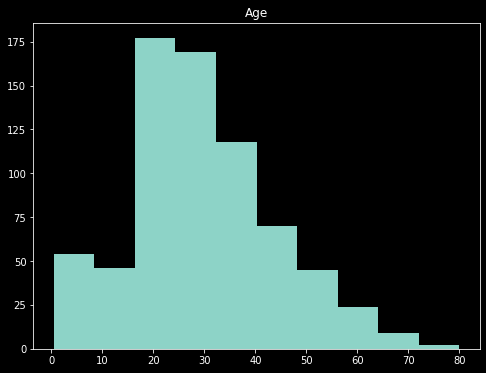

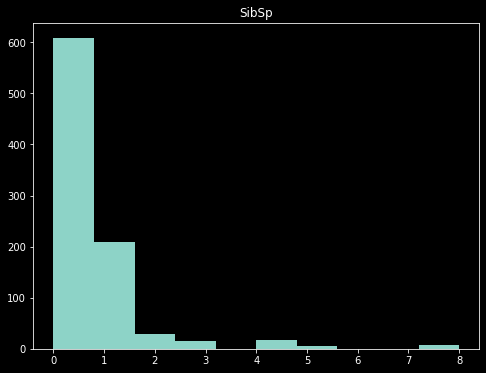

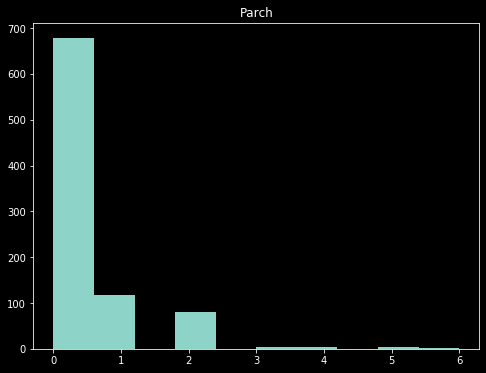

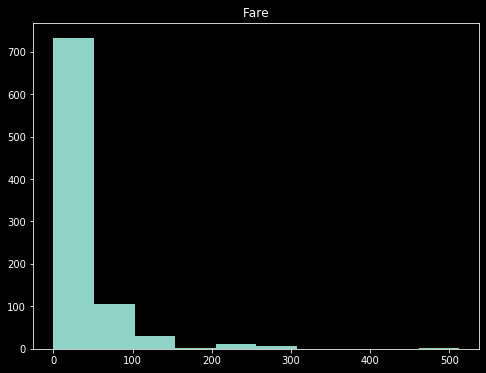

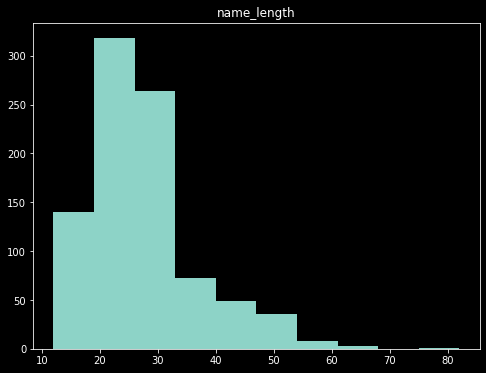

In [25]:
for i in numeric.columns:
    plt.hist(numeric[i])
    plt.title(i)
    plt.show()

In [26]:
correllation = train.corr()
correllation['Survived'].sort_values(ascending=False)

Survived          1.000000
name_length       0.332350
Fare              0.257307
Parch             0.081629
numeric_ticket    0.001492
SibSp            -0.035322
Age              -0.077221
Pclass           -0.338481
Name: Survived, dtype: float64

-Name length is the most positively correllated. Married women have the longest names so this supports our theory. <br>
-Fare should denote class along with cabin placement so this makes sense as well. <br>
-Pclass as a highly negative correllation makes sense for the same reason. <br><br>

Are there any interesting correllations between features?

In [27]:
correllation.drop(['Survived'], inplace=True)
correllation.drop(columns=['Survived'], inplace=True)
correllation

,Pclass,Age,SibSp,Parch,Fare,name_length,numeric_ticket
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.220001,0.079763
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.034612,-0.029886
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,0.165019,-0.080768
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.252282,-0.035762
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.155832,-0.173170
name_length,-0.220001,0.034612,0.165019,0.252282,0.155832,1.000000,-0.032901
numeric_ticket,0.079763,-0.029886,-0.080768,-0.035762,-0.173170,-0.032901,1.000000


-The class that you're in is negatively correllated with Age. Older = more wealthy, more stable financially. A lot of young people rode the Titanic to find new opportunities in America. The older ones were more likely to be on vacation. <br>
-Fares obviously negatively correllated with class. <br>
-Age and Siblings/Spouses count are negatively correllated. If you had siblings on board, you were more likely to be younger. <br>

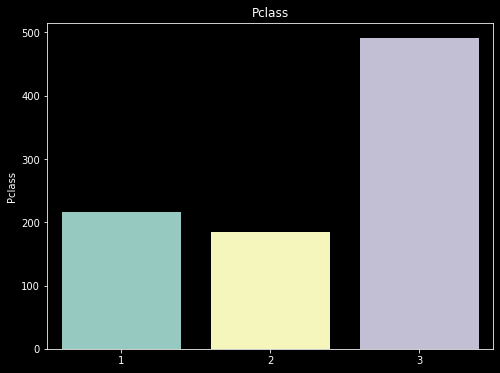

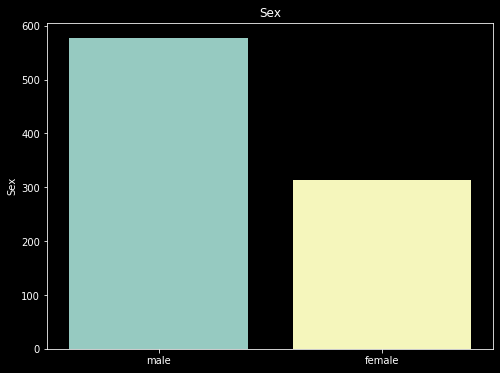

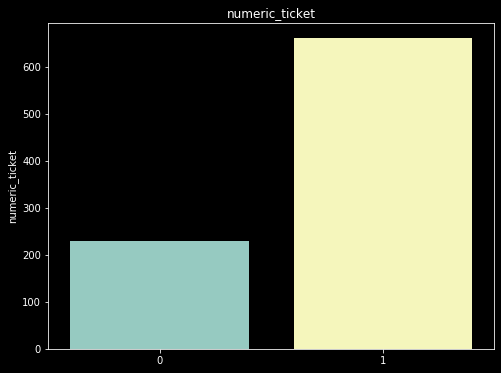

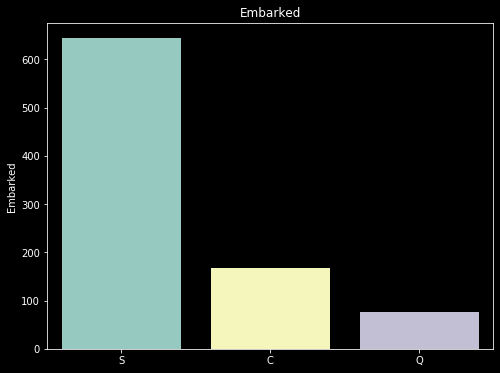

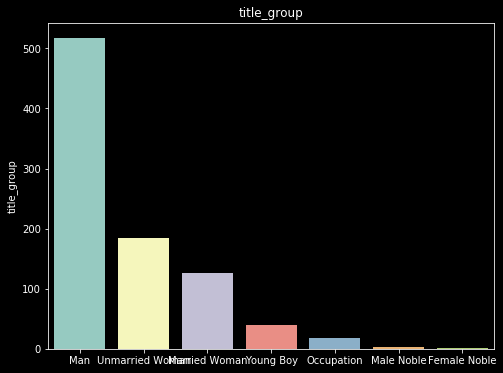

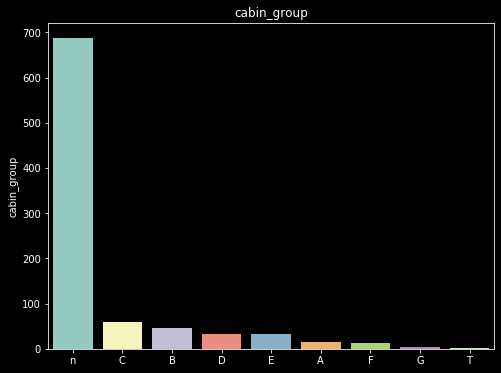

In [28]:
for i in categ.columns:
    sns.barplot(categ[i].value_counts().index, categ[i].value_counts()).set_title(i)
    plt.show()

In [29]:
make_pivots(['Pclass', 'numeric_ticket', 'Embarked', 'cabin_group'])

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

numeric_ticket    0    1
Survived                
0               142  407
1                88  254

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

cabin_group    A     B     C     D     E    F    G    T      n
Survived                                                      
0            8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1            7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0



## Preprocessing

Missing values:

In [30]:
print(train.isna().sum())
train.isna().sum()/len(train)

Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
name_length         0
title               0
title_group         0
numeric_ticket      0
cabin_group         0
dtype: int64


Survived          0.000000
Pclass            0.000000
Name              0.000000
Sex               0.000000
Age               0.198653
SibSp             0.000000
Parch             0.000000
Ticket            0.000000
Fare              0.000000
Cabin             0.771044
Embarked          0.002245
name_length       0.000000
title             0.000000
title_group       0.000000
numeric_ticket    0.000000
cabin_group       0.000000
dtype: float64

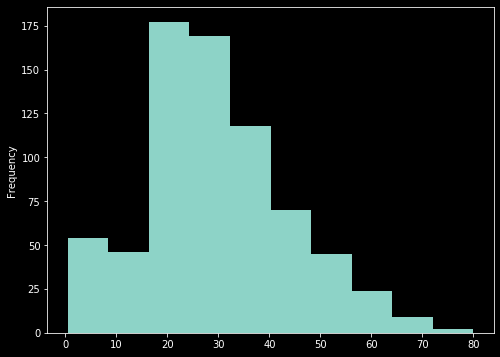

In [31]:
#Look at the distribution of Age
train['Age'].plot(kind='hist')
plt.show()

We'll use SimpleImputer to impute the median for age. 

In [32]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'median')
train['Age'] = impute.fit_transform(train[['Age']])

In [33]:
#Drop the 2 rows that are missing Embarked data. 
train.dropna(subset=['Embarked'], inplace=True)
#Drop the columns that we performed feature engineering on. 
train.drop(columns=['Cabin', 'Name', 'Ticket', 'title'], inplace=True)

We're going to use onehotencoding to create numerical features out of our categorical ones. 

In [34]:
#List of categorical features
hotlist=['Pclass','Sex','Embarked', 'numeric_ticket', 'cabin_group', 'title_group']

In [106]:
#Onehotencoding Function 
def onehot(dataframe, columns):
    from sklearn.preprocessing import OneHotEncoder
    onehotdf = dataframe[columns]
    encoder = OneHotEncoder(drop='first',sparse=False)
    encoded = encoder.fit_transform(onehotdf)
    encdf = pd.DataFrame(encoded, columns=encoder.get_feature_names())
    df = pd.concat([dataframe.reset_index(), encdf], axis=1).drop(columns=columns, axis=1)
    return df

traindf = onehot(train, hotlist)
traindf.set_index('PassengerId', inplace=True)
traindf.head()

,Survived,Age,SibSp,Parch,Fare,name_length,x0_2,x0_3,x1_male,x2_Q,...,x4_F,x4_G,x4_T,x4_n,x5_Male Noble,x5_Man,x5_Married Woman,x5_Occupation,x5_Unmarried Woman,x5_Young Boy
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,23,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,38.0,1,0,71.2833,51,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,26.0,0,0,7.9250,22,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,35.0,1,0,53.1000,44,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0,35.0,0,0,8.0500,24,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
traindf_scaled = traindf.copy()
traindf_scaled[['Age','SibSp', 'Parch', 'Fare', 'name_length']] = scaler.fit_transform(
    traindf[['Age','SibSp', 'Parch', 'Fare', 'name_length']])


In [109]:
X_train = traindf_scaled.drop(columns='Survived')
y_train = traindf_scaled['Survived']

## Testing Classifiers

In [38]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [39]:
lr = LogisticRegression()
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.80337079 0.79775281 0.8258427  0.85310734]
0.8245540531962166


In [40]:
0.8245540531962166

0.8245540531962166

In [41]:
gb = LGBMClassifier()
cv = cross_val_score(gb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.8258427  0.84269663 0.81460674 0.83615819]
0.8256586047102139


In [42]:
0.8256586047102139

0.8256586047102139

In [43]:
svc = SVC()
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.82022472 0.82022472 0.80337079 0.86440678]
0.8301847267187202


In [44]:
0.8301847267187202

0.8301847267187202

## Hyperparameter Optimization

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 

In [46]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [47]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s


Logistic Regression
Best Score: 0.8290611312131023
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


In [48]:
0.8290611312131023

0.8290611312131023

Text(0.5, 0, 'Relative Feature Importance')

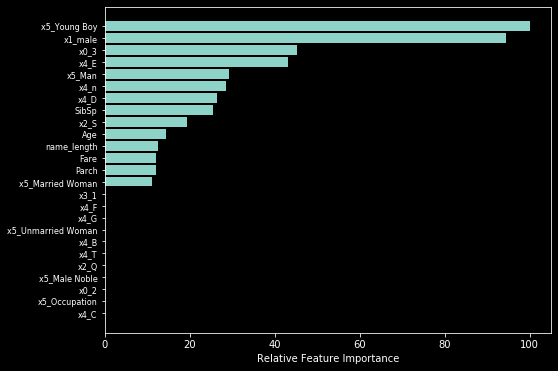

In [49]:
lr = LogisticRegression(C=0.615848211066026, max_iter=2000, penalty='l1', solver='liblinear')
lr.fit(X,y)

feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

In [85]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 260 out of 275 | elapsed:   21.5s remaining:    1.1s


SVC
Best Score: 0.8324382657271631
Best Parameters: {'C': 0.1, 'degree': 3, 'kernel': 'poly'}


[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:   59.7s finished


0.8425442772805181

In [63]:
gb = LGBMClassifier()

param_grid = {
    'learning_rate': np.arange(.01, 0.5, .01),
    'max_depth' : np.arange(1, 30, 1),
    'num_leaves' : np.arange(10, 200, 1),
    'feature_fraction' : np.arange(.1,1,.1),
    'subsample': np.arange(.1, 1,.1)
}
clf_gb = RandomizedSearchCV(gb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1, n_iter=4000)
best_clf_gb = clf_gb.fit(X_train,y_train)
clf_performance(best_clf_gb,'GB')

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 2960 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 4760 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 6960 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 9560 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12560 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 15960 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 19760 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 19985 out of 20000 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:  2.3min finished


GB
Best Score: 0.8459087158001651
Best Parameters: {'subsample': 0.5, 'num_leaves': 18, 'max_depth': 25, 'learning_rate': 0.06999999999999999, 'feature_fraction': 0.2}


In [64]:
clf = LGBMClassifier(subsample=0.5, num_leaves=18, max_depth=25, learning_rate=0.06999999999999999, feature_fraction=0.2)
clf.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.2, importance_type='split',
               learning_rate=0.06999999999999999, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=18, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

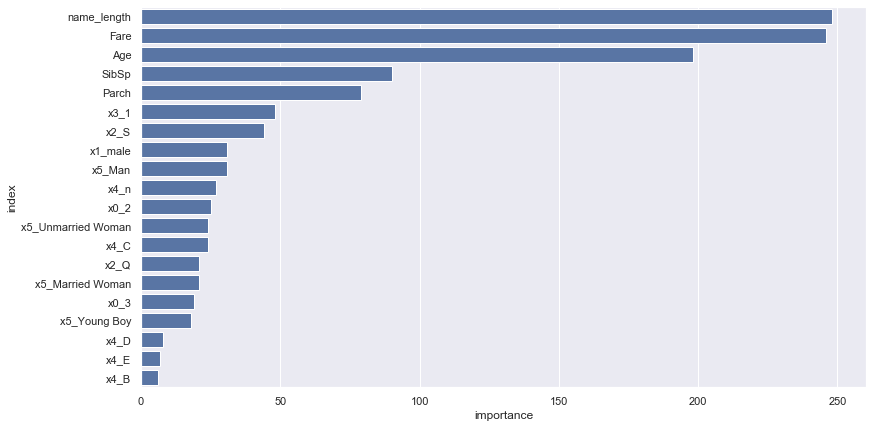

In [65]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()

#sns.set(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
#sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances.head(20),
            label="Total", color="b")
plt.show()

# Creating Predictions

In [169]:
test = pd.read_csv('datasets/test.csv', index_col='PassengerId')

In [170]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [163]:
test['name_length'] = test.Name.apply(lambda x: len(x))
test['title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['title_group'] = test['title'].apply(title_group)
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['cabin_group'] = test.Cabin.apply(lambda x: str(x)[0])
test['Age'] = impute.fit_transform(test[['Age']])
test['Fare'] = impute.fit_transform(test[['Fare']])
test.drop(columns=['Cabin', 'Name', 'Ticket', 'title'], inplace=True)
testdf = onehot(test, hotlist)
testdf.set_index('PassengerId', inplace=True)
testdf_scaled = testdf.copy()
testdf_scaled[['Age','SibSp', 'Parch', 'Fare', 'name_length']] = scaler.fit_transform(
    testdf_scaled[['Age','SibSp', 'Parch', 'Fare', 'name_length']])

,Age,SibSp,Parch,Fare,name_length,x0_2,x0_3,x1_male,x2_Q,x2_S,...,x4_D,x4_E,x4_F,x4_G,x4_n,x5_Man,x5_Married Woman,x5_Occupation,x5_Unmarried Woman,x5_Young Boy
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,7.8292,16,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
893,47.0,1,0,7.0000,32,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
894,62.0,0,0,9.6875,25,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
895,27.0,0,0,8.6625,16,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
896,22.0,1,1,12.2875,44,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [164]:
testdf['x5_Male Noble'] = 0
testdf['x4_T'] = 0
model_order = ['Age', 'SibSp', 'Parch', 'Fare', 'name_length', 'x0_2',
       'x0_3', 'x1_male', 'x2_Q', 'x2_S', 'x3_1', 'x4_B', 'x4_C', 'x4_D',
       'x4_E', 'x4_F', 'x4_G', 'x4_T', 'x4_n', 'x5_Male Noble', 'x5_Man',
       'x5_Married Woman', 'x5_Occupation', 'x5_Unmarried Woman',
       'x5_Young Boy']
testdf = testdf[model_order]

In [173]:
predictions = clf.predict(y_test)

In [192]:
solutiondf = pd.DataFrame(predictions)
solutiondf.set_index(y_test.index, inplace=True)
solutiondf.rename(columns = {0:'Survived'}, inplace=True)
solutiondf.head

<bound method NDFrame.head of              Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                1

[418 rows x 1 columns]>

In [194]:
solutiondf.to_csv('datasets/titanic_prediction.csv')

In [78]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,title,title_group,numeric_ticket,cabin_group
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,16,Mr,Man,1,n
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,32,Mrs,Married Woman,1,n
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,25,Mr,Man,1,n
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,16,Mr,Man,1,n
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,44,Mrs,Married Woman,1,n


In [ ]:
#train.dropna(subset=['Embarked'], inplace=True)
#Drop the columns that we performed feature engineering on. 
train.drop(columns=['Cabin', 'Name', 'Ticket', 'title'], inplace=True)
newdf = onehot(train, hotlist)
newdf.set_index('PassengerId', inplace=True)
newdf.head()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdf_scaled = newdf.copy()
newdf_scaled[['Age','SibSp', 'Parch', 'Fare', 'name_length']] = scaler.fit_transform(
    newdf_scaled[['Age','SibSp', 'Parch', 'Fare', 'name_length']])
